In [1]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv('tweets.csv')

In [31]:
data.head(5)

,id,keyword,location,text,target,reviews
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana ston...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section has been imposed in bhain...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pard...


In [30]:
data['text'][3]

'Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9'

In [6]:
website= lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x)
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.text.map(website).map(alphanumeric).map(punc_lower)

In [7]:
bag=data.loc[data['target']==1,'reviews']

In [8]:
bag[3]

'arsonist sets cars ablaze at dealership  '

In [9]:
vectorizer1 = CountVectorizer(stop_words='english')
doc_word1 = vectorizer1.fit_transform(bag)
doc_word1.shape

(2114, 5802)

In [10]:
pd.DataFrame(doc_word1.toarray(), index=bag, columns=vectorizer1.get_feature_names()).head(2)

,aaronjayjack,ab,abandoned,abbots,abbotsford,abductors,abel,ablanari,ablaze,able,...,zombie,zone,zoo,zulaikha,épicentre,österma,جمو,مقبوضہ,गर,मह
reviews,,,,,,,,,,,,,,,,,,,,,
communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze…,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
telangana section has been imposed in bhainsa from january to after clash erupted between two groups on january po…,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
#topic_word = pd.DataFrame(lsa.components_.round(3),
             #columns = vectorizer.get_feature_names())
#topic_word

In [13]:
lsa1 = TruncatedSVD(8,random_state=123)
doc_topic1 = lsa1.fit_transform(doc_word1)
#lsa.explained_variance_ratio_,lsa.explained_variance_ratio_.sum()
display_topics(lsa1, vectorizer1.get_feature_names(), 30)


Topic  0
people, bus, sinkhole, china, killed, nc, thunderstorm, swallows, severe, warning, amp, volcano, dead, taal, iran, alert, news, including, weather, est, huge, eruption, pm, ground, killing, australia, pedestrians, philippines, hit, just

Topic  1
nc, thunderstorm, severe, warning, alert, est, weather, including, pm, continues, mount, olive, nwsseveretstorm, tn, cst, volcano, nws, elroy, taal, ga, va, eruption, winds, brogden, clinton, mph, dev, storm, nj, near

Topic  2
volcano, taal, eruption, philippines, amp, ash, thousands, news, iran, people, hazardous, live, seismic, manila, hundreds, fires, train, affected, australia, intense, activity, level, possible, lava, urged, erupted, flee, island, update, hit

Topic  3
train, freight, hitchin, derailment, derailed, morning, low, hi, speed, iran, services, experienced, sorry, service, road, good, people, amp, running, depot, trains, collision, area, reduced, causing, delays, just, emergency, hit, near

Topic  4
iran, people, amp

In [14]:
Vt = pd.DataFrame(doc_topic1.round(5),
             index = bag)
Vt

,0,1,2,3,4,5,6,7
reviews,,,,,,,,
communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze…,0.07653,-0.00088,0.08448,0.05685,0.08199,0.14494,0.00698,0.00325
telangana section has been imposed in bhainsa from january to after clash erupted between two groups on january po…,0.07748,0.01518,0.14080,-0.01373,0.00424,0.05453,-0.01255,0.01447
arsonist sets cars ablaze at dealership,0.01178,-0.00353,0.00858,0.02242,0.00969,-0.00307,-0.01987,-0.00709
arsonist sets cars ablaze at dealership,0.01178,-0.00353,0.00858,0.02242,0.00969,-0.00307,-0.01987,-0.00709
several houses have been set ablaze in ngemsibaa village oku sub division in the north west region of cameroon by…,0.07955,0.00934,0.07350,0.08201,0.06582,0.14177,-0.04770,0.01459
...,...,...,...,...,...,...,...,...
kesian ular we have wrecked their natural habitat,0.00922,-0.00245,0.00770,0.00371,0.00900,-0.00012,-0.01071,-0.00570
yeah proper liverpool fans wrecked man city’s bus and the heysel stadium,0.33752,-0.25908,-0.16396,-0.05910,-0.19344,0.11986,0.05733,-0.05700
trump and sisi rejected foreign exploitation and agreed that parties must take urgent steps to resolve the conflict before…,0.02294,-0.00848,0.01028,0.01600,0.05549,-0.02283,0.04017,-0.02207


In [15]:
compare_item = 2
for item in range(15):
    if item != compare_item:
        print("Tweets %s & %s: "%(compare_item,item), np.dot(Vt.T.iloc[:,compare_item],Vt.T.iloc[:,item]))

Tweets 2 & 0:  0.0030918274
Tweets 2 & 1:  0.0017798211
Tweets 2 & 3:  0.0012759081000000001
Tweets 2 & 4:  0.0044203407999999994
Tweets 2 & 5:  0.0051141083
Tweets 2 & 6:  0.0045490784999999995
Tweets 2 & 7:  0.0063708185
Tweets 2 & 8:  0.0029618432000000005
Tweets 2 & 9:  0.0032424013000000003
Tweets 2 & 10:  0.0034221594000000003
Tweets 2 & 11:  0.0023028288
Tweets 2 & 12:  0.0015164666000000002
Tweets 2 & 13:  0.0067488962
Tweets 2 & 14:  0.0008242412


In [16]:
cosine_similarity((Vt.iloc[1,:].values, Vt.iloc[2,:].values)).round()

array([[1., 0.],
       [0., 1.]])

In [17]:
vectorizer2 = CountVectorizer(ngram_range=(2,2), stop_words='english')
doc_word2 = vectorizer2.fit_transform(bag)

In [18]:
lsa2 = TruncatedSVD(10,random_state=123)
doc_topics2 = lsa2.fit_transform(doc_word2)
#lsa.explained_variance_ratio_,lsa.explained_variance_ratio_.sum()
display_topics(lsa2, vectorizer2.get_feature_names(), 30)


Topic  0
severe thunderstorm, thunderstorm warning, warning including, weather alert, alert severe, warning continues, nc pm, pm est, olive nc, mount olive, nwsseveretstorm severe, nc mount, nc elroy, elroy nc, dev severe, warning cst, brogden nc, nc brogden, including clinton, clinton nc, nc est, blacksburg nwsblacksburg, nwsblacksburg severe, nws blacksburg, goldsboro nc, grange nc, la grange, continues mount, jackson ga, locust grove

Topic  1
home killed, grandmother prayer, survives powerful, tornado flattened, flattened home, prayer closet, powerful tornado, closet survives, body parts, puerto rico, reduced service, caa protestors, aid anti, anti caa, running reduced, parts bag, legal aid, kota lawyer, arrested giving, protestors kota, police electrocuted, giving legal, service moment, china sinkhole, killed ground, ground swallows, sinkhole killed, falsely arrested, lawyer india, electrocuted falsely

Topic  2
freight train, speed derailment, low speed, derailment hitchin, trai

In [19]:
lsa2.explained_variance_ratio_,lsa2.explained_variance_ratio_.sum()

(array([0.00642882, 0.00527067, 0.00452363, 0.00436544, 0.00432663,
        0.00321825, 0.00320249, 0.00311041, 0.00277514, 0.00262439]),
 0.03984585850155734)

In [20]:
Vt2 = pd.DataFrame(doc_topics2.round(5),
             index = bag,
             columns = ["Thunderstorm","Tornado","Train Accident","Volcano Eruption","Sinkhole","Nuclear Meltdown","Hail Storm","Virus OutBreak","Terrorist Bombing","Electrocution" ])
Vt2

,Thunderstorm,Tornado,Train Accident,Volcano Eruption,Sinkhole,Nuclear Meltdown,Hail Storm,Virus OutBreak,Terrorist Bombing,Electrocution
reviews,,,,,,,,,,
communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze…,0.00010,-0.00001,-0.00015,0.00001,-0.00002,-0.00002,0.00027,-0.00062,-0.00006,0.00008
telangana section has been imposed in bhainsa from january to after clash erupted between two groups on january po…,-0.00000,0.00001,0.00000,0.00001,0.00001,0.00010,0.00000,-0.00003,0.00011,0.00017
arsonist sets cars ablaze at dealership,0.00000,-0.00000,0.00001,0.00000,0.00000,-0.00003,0.00002,-0.00002,-0.00003,-0.00003
arsonist sets cars ablaze at dealership,0.00000,-0.00000,0.00001,0.00000,0.00000,-0.00003,0.00002,-0.00002,-0.00003,-0.00003
several houses have been set ablaze in ngemsibaa village oku sub division in the north west region of cameroon by…,0.01079,-0.00001,-0.00014,-0.00002,-0.00004,0.00029,-0.00062,-0.00043,0.00011,0.00073
...,...,...,...,...,...,...,...,...,...,...
kesian ular we have wrecked their natural habitat,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000
yeah proper liverpool fans wrecked man city’s bus and the heysel stadium,-0.00000,-0.00000,-0.00001,-0.00001,-0.00002,0.00000,0.00005,0.00008,0.00005,-0.00021
trump and sisi rejected foreign exploitation and agreed that parties must take urgent steps to resolve the conflict before…,-0.00008,-0.00018,-0.00017,0.00034,-0.00006,0.00448,-0.00421,0.00213,0.00254,0.00116


In [21]:
Vt2['Cat']=Vt2.idxmax(axis=1, skipna=True)

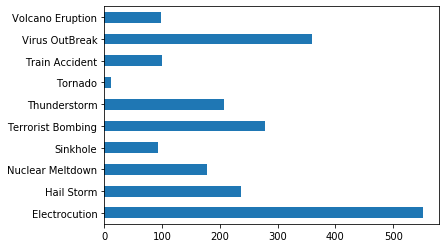

In [22]:
Vt2.Cat.value_counts().sort_index().plot.barh()

In [23]:
Vt2.Cat.value_counts().sort_values(ascending=False)

Electrocution        552
Virus OutBreak       360
Terrorist Bombing    278
Hail Storm           236
Thunderstorm         208
Nuclear Meltdown     178
Train Accident        99
Volcano Eruption      98
Sinkhole              93
Tornado               12
Name: Cat, dtype: int64

In [24]:
count=pd.DataFrame(Vt2.Cat.value_counts().sort_values(ascending=False))
count.rename(columns={'Cat':'Tweets Count'},inplace=True)
count

,Tweets Count
Electrocution,552
Virus OutBreak,360
Terrorist Bombing,278
Hail Storm,236
Thunderstorm,208
Nuclear Meltdown,178
Train Accident,99
Volcano Eruption,98
Sinkhole,93
Tornado,12


In [25]:
import matplotlib as plt
import seaborn as sns

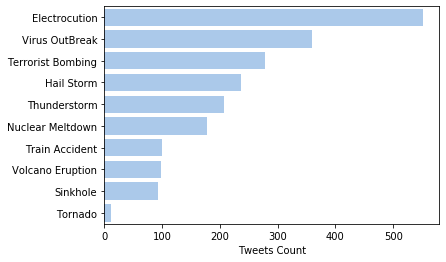

In [26]:
sns.set_color_codes("pastel")
sns.barplot(x=count['Tweets Count'], y=count.index, data=count, orient='h', color="b",)
#plt.savefig('hbar.png')

In [27]:
vectorizer3 = CountVectorizer(ngram_range=(3,3), stop_words='english')
doc_words3 = vectorizer3.fit_transform(bag)

In [28]:
lsa3 = TruncatedSVD(8,random_state=123)
doc_topics3 = lsa3.fit_transform(doc_words3)
#lsa.explained_variance_ratio_,lsa.explained_variance_ratio_.sum()
display_topics(lsa3, vectorizer3.get_feature_names(), 10)


Topic  0
flattened home killed, survives powerful tornado, closet survives powerful, prayer closet survives, powerful tornado flattened, tornado flattened home, grandmother prayer closet, troops clear rubble, clear rubble iraq, iraq base days

Topic  1
severe thunderstorm warning, thunderstorm warning including, alert severe thunderstorm, weather alert severe, thunderstorm warning continues, mount olive nc, nc pm est, nwsseveretstorm severe thunderstorm, nc mount olive, nc elroy nc

Topic  2
intense seismic activity, volcano news live, taal volcano news, thousands urged flee, urged flee possible, flee possible eruption, hundreds thousands urged, live hundreds thousands, news live hundreds, seismic activity rocks

Topic  3
low speed derailment, speed derailment hitchin, freight train experienced, train experienced low, experienced low speed, train low speed, derailment hitchin area, derailment hitchin trains, hitchin trains don, don experience thank

Topic  4
years nuclear disaster, re